# <center>A Statistical Analysis of Music Taste</center>
## <center>MAT 441 Applied Statistics | DePaul University</center>
## <center>Yianni Mercer | Fall 2021</center>
 <center> <img src="imgs/Spotify_Logo_RGB_Green.jpeg" style="height:100px">  <center>

# Abstract
Utilizing Spotify's REST API, paired with a [third party data source](https://www.kaggle.com/zaheenhamidani/ultimate-spotify-tracks-db) we were able to analyze over 175 thousand songs, that all contained categorical track information and numerical audio data.  These features consisted of genre, artist's name, popularity, acousticness, danceability, track duration, energy, instrumentalness, tempo, time signature, and valence.   Additionally, the Spotify API allowed us to extract *liked* tracks from a given user, along with the date these songs were added to their *Favorites* playlist.  The goal of this analysis, at a glance, was to quantify the individual's listening habits.  Specifically, this report aims to determine how each of the former audio features relate to the likelihood the individual will like a given song, and to build a model that could predict this event.  Overall, our analysis found that danceability is affected by the level of acousticness in a given track.  Additionally, we found that the *popularity* feature contributed the most to the event of our user *liking* a track, relative to the correlation these two variables possesed.  We also uncovered that the user we had data for did not change their music taste between seasons.  Lastly, through logistic regression, we were able to build a model that predicted 172,727 records of our data correctly. 

# Background and Purpose of Study
Spotify is just one of many audio streaming platforms and digital media service providers.  According to [Statista](https://www.statista.com/statistics/244995/number-of-paying-spotify-subscribers/), over 172 million people subscribe to Spotify's premium services as of September 2021.  Digital music distribution, as an industry, is increasingly powered by automated mechanisms that continuously capture, sort, and analyze large amounts of Web-based data [(Spera, 2019)](https://www.researchgate.net/publication/340171849_A_Model_Based_Approach_to_Spotify_Data_Analysis_A_Beta_GLMM).  While there are some platforms like Apple Music who do not allow their users or any developers to access this data, Spotify is on the other side of this fence.  Spotify, since at least 2014, has allowed their users and developers to access the data the platform has at it's disposal via the *Spotify Web API* [(Robles, 2014)](https://www.programmableweb.com/news/spotify-launches-new-version-its-web-api/2014/06/17). Since then, countless number of companies and individual people have been able to harness this data for use in their application or software. [[3]](https://developer.spotify.com/community/showcase/)  However, many data enthusiasts, see a rare opportunity to analyze numerical data that they themselves are generating nearly every day of their lives.  The comprehensive goal of this report is aimed to quantify the likelihood of the event of a specific individual liking a song (adding to their *favorites* playlist) would happen using logistic regression techniques. [(Dias, 2020)](https://medium.com/swlh/spotify-playlist-classification-with-logistic-regression-f0a7689d7f2f)  However, this objective sparked more question than answers. For instance, is there an audio feature, perhaps popularity, that is a very strong indicator of adding the song to their *favorites* playlist (*like* the song)?  Are there statistically signficant relationships between audio features where the value of one could affect another? [[10]](https://www.studocu.com/en-us/document/university-of-san-francisco/advanced-statistics/1-statistical-inference/11287373)  What really does make a song a hit and popular? [(Arancibia, 2021)](https://medium.com/codex/analyzing-spotify-data-tracks-what-makes-a-song-a-hit-and-popular-5ef319272fde)  Does my music taste change from season to season? 

# Data Collection & Information
Data on over 100 thousand tracks within Spotify's library were collected using the platform's Web API.  The original data collection method was to scrape 10,000 tracks per genre.  With 26 genres in Spotify's library, we were left with 232,725 tracks. After removing duplicates where the artist and track name were the same, we were left with 176,514 records in the data frame.  Subsequently, using the Web API again, we pulled the same data, however filtering for songs that are in my *favorites* playlist and the date it was *liked*.  These data frames were merged by creating a *liked* variable in the larger Spotify library data frame, where 1 implies the song is in the person's *favorites* playlist, and 0 meaning it is not.  It is important to note that when the term *liked* appears, it is referencing the physical action of adding the track to Spotify's personal *favorites* playlist, not actual distaste or favorement towards a track on any emotional or psychological level.  The majority of variables in the data were numerical features that Spotify calculates for each of its tracks in their library.  The audio features and Spotify's official defintion for each can be found below.  I've also included the two engineered columns (*liked*, *liked_date*).  

* popularity - popularity measured of the track.  The value ranges from 0 to 100, 100 being the most popular. 


* acousticness	- A confidence measure from 0.0 to 1.0 of whether the track is acoustic. 1.0 represents high confidence the track is acoustic.  


* danceability - Danceability describes how suitable a track is for dancing based on a combination of musical elements including tempo, rhythm stability, beat strength, and overall regularity. A value of 0.0 is least danceable and 1.0 is most danceable.  


* duration_ms - the duration of the track in milliseconds.  


* energy - Energy is a measure from 0.0 to 1.0 and represents a perceptual measure of intensity and activity. Typically, energetic tracks feel fast, loud, and noisy. For example, death metal has high energy, while a Bach prelude scores low on the scale. Perceptual features contributing to this attribute include dynamic range, perceived loudness, timbre, onset rate, and general entropy.  


* instrumentalness - Predicts whether a track contains no vocals. "Ooh" and "aah" sounds are treated as instrumental in this context. Rap or spoken word tracks are clearly "vocal". The closer the instrumentalness value is to 1.0, the greater likelihood the track contains no vocal content. Values above 0.5 are intended to represent instrumental tracks, but confidence is higher as the value approaches 1.0.  


* liveness - Detects the presence of an audience in the recording. Higher liveness values represent an increased probability that the track was performed live. A value above 0.8 provides strong likelihood that the track is live.  


* loudness - The overall loudness of a track in decibels (dB). Loudness values are averaged across the entire track and are useful for comparing relative loudness of tracks. Loudness is the quality of a sound that is the primary psychological correlate of physical strength (amplitude). Values typical range between -60 and 0 db.  


* speechiness - Speechiness detects the presence of spoken words in a track. The more exclusively speech-like the recording (e.g. talk show, audio book, poetry), the closer to 1.0 the attribute value. Values above 0.66 describe tracks that are probably made entirely of spoken words. Values between 0.33 and 0.66 describe tracks that may contain both music and speech, either in sections or layered, including such cases as rap music.   Values below 0.33 most likely represent music and other non-speech-like tracks.  


* tempo	- The overall estimated tempo of a track in beats per minute (BPM). In musical terminology, tempo is the speed or pace of a given piece and derives directly from the average beat duration.  


* valence - A measure from 0.0 to 1.0 describing the musical positiveness conveyed by a track. Tracks with high valence sound more positive (e.g. happy, cheerful, euphoric), while tracks with low valence sound more negative (e.g. sad, depressed, angry).  


* key - The key the track is in. Integers map to pitches using standard Pitch Class notation. E.g. 0 = C, 1 = C♯/D♭, 2 = D, and so on.  


* mode - Mode indicates the modality (major or minor) of a track, the type of scale from which its melodic content is derived. Major is represented by 1 and minor is 0.  


* time_signature - An estimated overall time signature of a track. The time signature (meter) is a notational convention to specify how many beats are in each bar (or measure).


* liked - a boolean feature that indicates if the value is 1 the song was added to my *favorites* playlist and 0 if not 


* liked_date - a date-time feature that indicates when the track was liked (assumes liked == 1)


* track_id - unique identifier for each individual track in Spotify's library


When examning the dataset as whole, there are no missing values, except within the liked_date column.  Logically, this is valid as the majority of our data is not in our *favorites* playlist, and therefore a majority of the tracks will not have a date in which the song was *liked*.  Additionally, as different sections of our analysis may focus on different audio features and ranges within those (e.g., popular tracks), we cannot justify removing any observations at the moment.  The numerical audio features like popularity, acousticness, danceability, energy, duration_ms, etc., will all play a pivotal role in our analysis as we begin to dive into the sample of tracks from Spotify's library, while drawing conclusions about the individual's music taste and listening habits. 

## Descriptive Statistics
### Numerical Summary Statistics

In [1]:
import pandas as pd #Pandas DF == Tidyverse/Dplyr in R
import os #Navigating Directories in Python
pd.options.mode.chained_assignment = None  # default='warn'

#Back out 1 directory 
path_parent = os.path.dirname(os.getcwd())
os.chdir(path_parent)

#Read in Data
df = pd.read_csv("data_collection/data_files/spotify_liked_final_df.csv", parse_dates = ['liked_date']) # Read in Data
df.drop(['Unnamed: 0'],axis =1,inplace = True) # Drop the extra index column that was read in
df.describe().T 

,count,mean,std,min,25%,50%,75%,max
popularity,176514.0,36.257634,17.392089,0.00000,25.0000,37.000000,49.0000,100.000
acousticness,176514.0,0.403876,0.366286,0.00000,0.0455,0.288000,0.7910,0.996
danceability,176514.0,0.541111,0.190441,0.05690,0.4150,0.558000,0.6830,0.989
duration_ms,176514.0,236154.005665,130574.867253,15387.00000,178280.0000,219475.000000,268573.0000,5552917.000
energy,176514.0,0.557203,0.275855,0.00002,0.3440,0.592000,0.7890,0.999
instrumentalness,176514.0,0.172211,0.323038,0.00000,0.0000,0.000071,0.0914,0.999
liveness,176514.0,0.224628,0.211150,0.00967,0.0975,0.130000,0.2770,1.000
loudness,176514.0,-10.137290,6.398382,-52.45700,-12.8500,-8.189000,-5.6290,3.744
speechiness,176514.0,0.127471,0.204460,0.02220,0.0368,0.049400,0.1020,0.967
tempo,176514.0,117.214397,31.323689,30.37900,92.0070,115.009000,138.8250,242.903


### Snapshot of the Data Frame

In [2]:
df.head()

,genre,artist_name,track_name,track_id,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,...,liveness,loudness,mode,speechiness,tempo,time_signature,valence,liked,date_liked,liked_date
0,Movie,Henri Salvador,C'est beau de faire un Show,0BRjO6ga9RKCKjfDqeFgWV,0.0,0.611,0.389,99373.0,0.910,0.000,...,0.3460,-1.828,Major,0.0525,166.969,4/4,0.814,0.0,NaN,NaT
1,Movie,Martin & les fées,Perdu d'avance (par Gad Elmaleh),0BjC1NfoEOOusryehmNudP,1.0,0.246,0.590,137373.0,0.737,0.000,...,0.1510,-5.559,Minor,0.0868,174.003,4/4,0.816,0.0,NaN,NaT
2,Movie,Joseph Williams,Don't Let Me Be Lonely Tonight,0CoSDzoNIKCRs124s9uTVy,3.0,0.952,0.663,170267.0,0.131,0.000,...,0.1030,-13.879,Minor,0.0362,99.488,5/4,0.368,0.0,NaN,NaT
3,Movie,Henri Salvador,Dis-moi Monsieur Gordon Cooper,0Gc6TVm52BwZD07Ki6tIvf,0.0,0.703,0.240,152427.0,0.326,0.000,...,0.0985,-12.178,Major,0.0395,171.758,4/4,0.227,0.0,NaN,NaT
4,Movie,Fabien Nataf,Ouverture,0IuslXpMROHdEPvSl1fTQK,4.0,0.950,0.331,82625.0,0.225,0.123,...,0.2020,-21.150,Major,0.0456,140.576,4/4,0.390,0.0,NaN,NaT


# Methodology of Analyses

## Relationship Between Danceability & Acousticness

Danceability, as defined by Spotify, is how suitable a track is for dancing based on a combination of musical elements including tempo, rhythm stability, beat strength, and overall regularity.  Acousticness is a confidence measure from 0.0 to 1.0 of whether the track is acoustic. 1.0 represents high confidence the track is acoustic.   Naturally we wonder, does acousticness affect a song's danceability?  Using basic logic of music creation and my personal experience, I imagine there is some type of tradeoff between the more instruments of acoustic that are used, means less of a bass, in turn meaning probably less chance the track is danceable.  I should preface, this is not a hypothesis, but more of how the current ideology I posses of these two variables and their relationship.


To answer the former, a Difference of Means Welch's T Test was conducted.  A Welch's T-Test was chosen over the Student's T-Test due to the unequal sample sizes we eventually arrived at.  However, the assumption normal distribution is still maintaned.  You can see below the distribution of our two variables in question.

In [3]:
# Print the descriptive statistics for "danceability" feature
df[['danceability','acousticness']].describe()

,danceability,acousticness
count,176514.000000,176514.000000
mean,0.541111,0.403876
std,0.190441,0.366286
min,0.056900,0.000000
25%,0.415000,0.045500
50%,0.558000,0.288000
75%,0.683000,0.791000
max,0.989000,0.996000


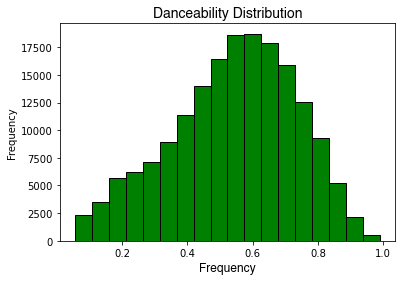

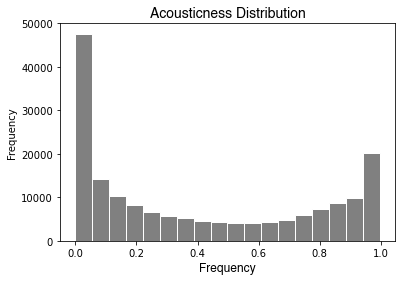

In [4]:
import matplotlib.pyplot as plt
## Transfer to a List
danceability = df['danceability'].tolist()
acousticness = df['acousticness'].tolist()

## Create histograms for each variable 
df['danceability'].plot(kind = 'hist', bins = 18, ec = 'black',color = 'green')
plt.title('Danceability Distribution', fontname = 'helvetica',fontsize = 14)
plt.xlabel("Danceability Value", fontname = 'helvetica',fontsize = 12)
plt.xlabel("Frequency", fontname = 'helvetica',fontsize = 12)
plt.show()

df['acousticness'].plot(kind = 'hist', bins = 18, ec = 'white',color = 'gray')
plt.title('Acousticness Distribution', fontname = 'helvetica',fontsize = 14)
plt.xlabel("Acousticness Value", fontname = 'helvetica',fontsize = 12)
plt.xlabel("Frequency", fontname = 'helvetica',fontsize = 12)
plt.show()

##### *Checking for Outliers* 

<AxesSubplot:>

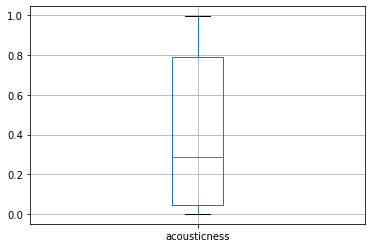

In [5]:
df.boxplot('acousticness')

Based on the above histograms, we can see the Danceability distribution clearly is approximately normal.  Its curve is nearly symmetrical, and has a nice bell-shape.  The same cannot be said for the Acoustiness distribution, however with respect to the scope of analysis this is irrelevant as we will be comparing the mean's of danceability over two independent samples.  However, the mean of the Acousticness should be noted - 0.403876.  


&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; When conducting the Welch's T Test, we declared the following null and alternative hypothesis:


1. *Ho*: acoustiness does not affect danceability.  𝜇 = 0.403876


2. *Ha*: acoustiness affects the danceability of a song. 𝜇 ≠ 0.403876

As this is a two-sided test, if we were to reject the null hypothesis, we would be implying a difference in danceability is noticeable when lowering or raising the acousticness value. We also declare a signficance level of the default α = 0.05 at this time. To summarise our conditions are met:


* The entire dataset contains songs spanning over decades, and centuries.  It is safe to assume that the sample is random.  


* Our independence assumption is met with the idea that there are no duplicates within the data and that each song is a unique track relative to the others in the dataset.  


* Additionally, our sample size is far greater than 30, therefore we can apply the Central Limit Theorm and claim normalacy with respect our sample means.  

In order to obtain two independent samples, we opted to split the data into two parts; first, where the acousticness is less than 0.5, and the second, where the acousticness is greater than 0.5.  Our assumptions above holds, and below you can see the danceability summary statistics and approximately normal distribution plots for the two samples. 

In [6]:
# Examine Sub Groups so we can have two independent groups  
less = df[df['acousticness'] < 0.5]
more = df[df['acousticness'] > 0.5]

In [7]:
# Print the descriptive statistics for "danceability" feature where acousticness is < 0.05
less[['danceability']].describe()

,danceability
count,107142.000000
mean,0.596695
std,0.164930
min,0.057000
25%,0.486000
50%,0.608000
75%,0.720000
max,0.989000


In [8]:
# Print the descriptive statistics for "danceability" feature where acousticness is > 0.05
more[['danceability']].describe()

,danceability
count,69299.000000
mean,0.455113
std,0.195219
min,0.056900
25%,0.299000
50%,0.468000
75%,0.603000
max,0.987000


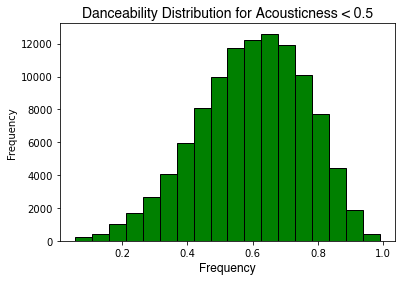

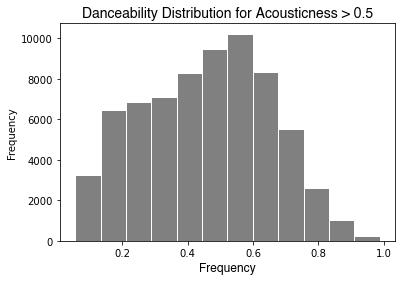

In [9]:
## Create histograms for each variable 
less['danceability'].plot(kind = 'hist', bins = 18, ec = 'black',color = 'green')
plt.title('Danceability Distribution for Acousticness < 0.5', fontname = 'helvetica',fontsize = 14)
plt.xlabel("Danceability Value", fontname = 'helvetica',fontsize = 12)
plt.xlabel("Frequency", fontname = 'helvetica',fontsize = 12)
plt.show()

more['danceability'].plot(kind = 'hist', bins = 12, ec = 'white',color = 'gray')
plt.title('Danceability Distribution for Acousticness > 0.5', fontname = 'helvetica',fontsize = 14)
plt.xlabel("Acousticness Value", fontname = 'helvetica',fontsize = 12)
plt.xlabel("Frequency", fontname = 'helvetica',fontsize = 12)
plt.show()

In [10]:
from scipy.stats import ttest_ind
ttest_ind(less['danceability'],more['danceability'],equal_var=False)

Ttest_indResult(statistic=157.91587794070708, pvalue=0.0)

The above output indicates the test staistics and p-value from the Two-Tailed Welch's T Test.  With a p-value considerably below 0, which is less than our signficance level of 0.05, we rejected the null hypothesis and accepted the alternative.  Therefore, we claimed danceability is affected by a change in acousticness of a track, regardless of direction.  In simpler terms, our statistical test of difference of means allows us to claim that these variables do in fact share some type of relationship, where danceability is affected when we change the level of acoustic instruments used on a given track.  We further supported this claim by conducting a confidence interval to provide some context of where our true value of the danceability mean is likely to be. The confidence interval for the difference of means was [-0.14333903359494937,-0.1398245008278447].  Therefore, we are 95% confidence that the true value of danceability falls within this interval. You can see this computation below.    

In [11]:
#Confidence Interval for Welch's T Test and Danceability True Mean
import numpy as np
n1 = len(less)
n2 = len(more)
x1 = less['danceability'].mean()
x2 = more['danceability'].mean()
diff_mean = x2-x1
s1 = np.std(less['danceability'],ddof = 1)
s2 = np.std(more['danceability'],ddof = 1)
SE = np.sqrt(s1**2/n1 + s2**2/n2)
ME = 1.96*SE

upper = diff_mean + ME
lower = diff_mean - ME
print("[{},{}]".format(lower,upper))

[-0.14333903359494937,-0.1398245008278447]


## The Relationship between Audio Features if the Track is Added to the *Favorites* Playlist

Based on the current setting of the industry, many of the songs that are considered *popular* often are being recorded by many of the same artists.  It's well known that popularity does not imply quality, and with the music listening activity being so opinionated as it is, it seems near impossible to develop a model that can predict if a song will be liked, that can also be generalized to a wide population.  However, in this analysis we possesed tracks there were liked by a single user.  Therefore, we can subset our data frame to only contain tracks that have been *liked*, and further analyze the remaining tracks.

In [12]:
# Subsetting Data Frame to only the tracks the individual has liked
df_liked = df[df['liked'] == 1]
print(df.shape)
df_liked.head()

(176514, 21)


,genre,artist_name,track_name,track_id,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,...,liveness,loudness,mode,speechiness,tempo,time_signature,valence,liked,date_liked,liked_date
145,R&B,Mariah Carey,Hero,4FCb4CUbFCMNRkI6lYc1zI,71.0,0.7350,0.501,257733.0,0.378,0.000000,...,0.1190,-9.370,Major,0.0290,119.987,4/4,0.178,1.0,NaN,NaT
147,R&B,Jason Derulo,Tip Toe (feat. French Montana),2z4pcBLQXF2BXKFvd0BuB6,76.0,0.0233,0.845,187521.0,0.709,0.000000,...,0.0940,-4.547,Minor,0.0714,98.062,4/4,0.620,1.0,2018-01-19T01:32:05Z,2018-01-19 01:32:05+00:00
157,R&B,Tove Lo,Habits (Stay High),14OxJlLdcHNpgsm4DRwDOB,67.0,0.0703,0.733,209160.0,0.650,0.000066,...,0.0829,-3.539,Major,0.0315,110.003,4/4,0.348,1.0,2018-01-19T05:31:42Z,2018-01-19 05:31:42+00:00
170,R&B,Dreezy,Body,20s34XSPIiYMGSFDRSs24t,62.0,0.5520,0.735,232707.0,0.567,0.000000,...,0.0659,-5.962,Major,0.0635,149.968,4/4,0.574,1.0,2018-01-19T05:33:32Z,2018-01-19 05:33:32+00:00
174,R&B,Usher,OMG (feat. will.i.am),1bM50INir8voAkVoKuvEUI,70.0,0.1980,0.781,269493.0,0.745,0.000011,...,0.3600,-5.810,Minor,0.0332,129.998,4/4,0.326,1.0,2018-01-19T05:39:25Z,2018-01-19 05:39:25+00:00


As we can see above, we have 3,830 tracks that were liked the individual user. With that many different tracks, we wondered if there was any correlation between the *liked* varaible and any of the audio features that we had at our disposal.  Below is the outputted correlation plot that describes the Pearson coefficient (the coefficients were calculated using the original data frame, not the subsetted one that was created above).  We are able to use the Pearson Correlation coefficient as we our audio features are numeric, and our *liked* feature is a binary variable that **only** take ones 2 values, 0 or 1.  If this feature happen to take on more than the two values, we would not be able to use the Pearson Coefficient.  Additionally, if we were trying to quantify the relationship between our *liked* variable, and  a different categorical feature, we would not use the Pearson Coefficient, but rather the Chi-Squre test. Regardless, we can proceed with a Pearson correlation.  This task was completed in R/RStudio as the correlation plots are much more aesthetically pleasing, however you can view the code in the Appendix [1]

<br/><br/>

 <center> <img src="imgs/Corr_Plot.png" style="height:800px" width="1000px">  <center>

The above correlation plot shows that the *liked* variable has a relatively strong positive relationship with the popularity audio feature.  In other words, it seemed this relationship can be described as the more popular a song is, the more likely the specific user liked the song.  As for the other audio features, they all relativiely reside near 0.0, indicating their was no reason to think these features posses a statistically signficant relationship with our *liked* variable. Therefore, based on the Pearson Coefficient, r = 0.23, we progressed into the subsequent analysis, with the assumption this is the most important indicator in the event of the user *liking* a song.

## Does the Music Taste of the Individual Change Over Time?

The former correlation plot indicates that the *popularity* variable posseses the strongest relationship with our *liked* variable.  Therefore, we will use this feature to conduct a signficance test that could answer the question of if the individual's music taste has changed over time.  The first step to this challenge is to seperate our liked song into two data frames.  We have chosen to create one data frame that represents all of the *liked* songs that were added to the *Favorites* playlist in the Winter, and a second data frame that represents the same columns, but instead it will be all songs that were *liked* in the Summer.  In this case, we are stating that the Winter months correspond to: December, January, and February, and the Summer months are: June, July and August.  The below code identifies which months fall into the seperate months/seasons, and subsets the respective data frames and assigns them to new objects that are titled appropriately.   

In [13]:
## Create a columns that houses just the month variable

dates = df_liked['liked_date'] # Assign the values of the liked_date variable to an object

df_liked['month'] = dates.dt.month # new column in the data frame that is based off the year

# Make season based off the above month variable, using lambda if else functionality
df_liked['season'] = df_liked['month'].apply(lambda x: 'Winter' if x in [12.0,1.0,2.0] else ('Summer' if x in [6.0,7.0,8.0] else np.nan))
df_liked.head()

df_summer = df_liked[df_liked['season'] == 'Summer']
df_winter = df_liked[df_liked['season'] == 'Winter']

Essentially, we have two independent samples from Spotify's entire track library.  One sample representing songs liked by the individual during the Winter months, the second representing songs *liked* during the Summer months.  Both of these sample sizes are far greater than 30, therefore meet the ambiguous rule of being *sufficiently large*.  In order to see if the the individual's music taste has changed over time, we will conduct a Comparison of Two Means T-Test on two samples, where the values represent the popularity variable, as this was formerly observed to be the feature that is the strongest indicator of the individual liking a song.

The null and alternative hypothesis were defined as: 

1. *Ho*: 𝜇1 = 𝜇2 


2. *Ha*: 𝜇1 ≠ 𝜇2 

*where the 𝜇1 represents the population of tracks liked in the Winter season, and 𝜇2 represents the population of songs liked in the Summer.*.   We are also declaring a significance level of α = 0.05 at this time. Below are the summary statistics for each sample's popularity feature.

In [14]:
df_summer['popularity'].describe()

count    344.000000
mean      68.767442
std       10.410719
min       25.000000
25%       62.000000
50%       70.000000
75%       75.000000
max       97.000000
Name: popularity, dtype: float64

In [15]:
df_winter['popularity'].describe()

count    1852.000000
mean       65.998920
std        10.334022
min         0.000000
25%        59.000000
50%        66.000000
75%        73.000000
max       100.000000
Name: popularity, dtype: float64

In [16]:
max(np.std(df_summer['popularity']),np.std(df_winter['popularity'])) / min(np.std(df_summer['popularity']),np.std(df_winter['popularity']))

1.0062282174064467

The above calulation represents the maximum of the two standard deviations, divided by the minimum of the two standard deviations, for each sample.  The result being less than 2, we can see it is equivalent to 1.0062282174064467, implies it is relatively safe to asssume that the population variances are equal.  Therefore, we can conduct a two-sample T-Test.  Additionally, below you can see the histograms of the popularity variable for each season.  They indeed do resemble a reasonable symmetric distribution.  

Text(0.5, 1.0, 'Distribution of Popularity for the Winter')

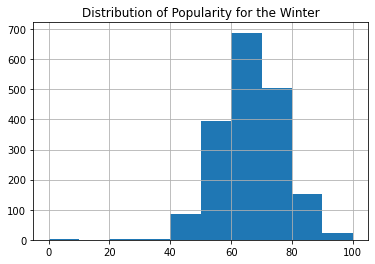

In [17]:
df_winter['popularity'].hist()
plt.title('Distribution of Popularity for the Winter')

Text(0.5, 1.0, 'Distribution of Popularity for the Summer"')

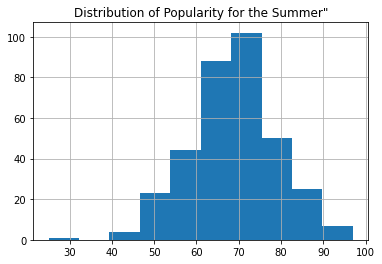

In [18]:
df_summer['popularity'].hist()
plt.title('Distribution of Popularity for the Summer"')

In [19]:
from scipy.stats import ttest_ind
ttest_ind(df_winter['danceability'],df_summer['danceability'],equal_var=True)

Ttest_indResult(statistic=0.39656378702430284, pvalue=0.6917277277921978)

The p-value from the above t-test was equivalent to about 0.6917.  As α = 0.05, we fail to reject the null hypothesis.  Therefore, there is no evidence to suggest that the mean popularity values differ between seasons.  Additionally, as popularity seems to be the strongest indicator of the individual *liking* a track, it can be said that the user's music taste most likely does not change from Winter to Summer.

## Modeling Audio Features to Predict *Liked*

In order to gain a holsitic understanding of the audio features and their relationship to the event of a track being *liked* we developed a logistic regression model using maximum likelihood estimation.  The below code summarizes logistic regression efforts we applied to our dataset.     

In [20]:
import statsmodels.api as sm

# Declare the X & y variables
X = sm.add_constant(df[['popularity','acousticness','danceability','duration_ms','energy','instrumentalness','liveness','loudness','speechiness','tempo','valence']])
y = df[['liked']]

# Fit the Logistic Regression Model
log_reg = sm.Logit(y,X).fit()

print(log_reg.summary())

Optimization terminated successfully.
         Current function value: 0.070828
         Iterations 11
                           Logit Regression Results                           
Dep. Variable:                  liked   No. Observations:               176514
Model:                          Logit   Df Residuals:                   176502
Method:                           MLE   Df Model:                           11
Date:                Mon, 22 Nov 2021   Pseudo R-squ.:                  0.3227
Time:                        21:36:51   Log-Likelihood:                -12502.
converged:                       True   LL-Null:                       -18459.
Covariance Type:            nonrobust   LLR p-value:                     0.000
                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
const               -7.7783      0.254    -30.647      0.000      -8.276      -7.281
popularity

The above output summary indicates that all of our independent variables are statistically significant except for one, *liveness*.  Additionally, you can see that the *tempo* variable has a relatively higher p-value than the other independent variables, however it still technically is lower than our α, which equals 0.05. Furtheremore, there is some promising evidence in the development of logistic regression models, as you can see that the LLR p-value above. This value being equivalen to to 0.000, which is considerably below any reasonable p-value (we will use 0.05 as a maximum signficance value) bodes well for our intentions of attempting to predict songs that we will like using our X variable. Below you can see how we refit our Logistic Regression model, removing our independent variable, *liveness*. 

In [21]:
# Declare the new X & y variables (remove liveness)
X = sm.add_constant(df[['popularity','acousticness','danceability','duration_ms','energy','instrumentalness','loudness','speechiness','tempo','valence']])
y = df[['liked']]

# Fit the Logistic Regression Model
log_reg = sm.Logit(y,X).fit()

print(log_reg.summary())

Optimization terminated successfully.
         Current function value: 0.070828
         Iterations 11
                           Logit Regression Results                           
Dep. Variable:                  liked   No. Observations:               176514
Model:                          Logit   Df Residuals:                   176503
Method:                           MLE   Df Model:                           10
Date:                Mon, 22 Nov 2021   Pseudo R-squ.:                  0.3227
Time:                        21:36:53   Log-Likelihood:                -12502.
converged:                       True   LL-Null:                       -18459.
Covariance Type:            nonrobust   LLR p-value:                     0.000
                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
const               -7.7796      0.253    -30.709      0.000      -8.276      -7.283
popularity

The first observation from the above Pseudo R-squared value, compared to our previous model, actually remained the same.  However, the previous model contained a feature that was not statistically significant, thus we can't just opt back to the original.  However, this model also shows some excellent statistical signficance, with the LLR p-value being equal to 0.000 again. We are going to attempt to predict using our logistic regression model, however before doing so the below code quickly analyzing our variance inflation factor to ensure that our model does not suffer from any multicollinearity issues.  

In [22]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
def calculate_vif(X): # Define calculate_vif function that accepts our independent variables as a data frame
    vif = pd.DataFrame() # Initiate an empty data frame called vif
    vif["variables"] = X.columns
    vif["VIF"] = [variance_inflation_factor(X.values, i) for i in  range(X.shape[1])] # Calculate the VIF for each independent variable
    return(vif) # Return the vif Data Frame we created earlier

calculate_vif(X)

,variables,VIF
0,const,113.382042
1,popularity,1.240926
2,acousticness,2.953982
3,danceability,1.967939
4,duration_ms,1.029827
5,energy,5.135199
6,instrumentalness,1.479280
7,loudness,4.340806
8,speechiness,1.518978
9,tempo,1.109700


The above table bodes well for our prediction efforts as none of our independent variables have a rather higher VIF.  It is important to note that the constant (intercept) does have a considerbly high VIF values, but removing it from our model makes very little sense in our purposes.

***logit(p) = -7.7796 + (popularity * 0.1135) + (acousticness * -0.8563)+(danceability * 0.5422)+(duration_ms * -1.554e-06 + (energy * -0.6181) + (instrumentalness * -1.9227) + (loudness * 0.1186) + (speechiness*0.7531) + (tempo * 0.0015   ) + (valence * -0.9883)*** 

Furthermore, the above equation defines our latest logistic regression model.  This is also the model we will be making predictions and evaluating the accuracy of, which can be seen below.  In this mode, b = 0.1135, c = -0.8563, d = 0.5422, and so oo.  Additionally, p = P{Y = 1}, which is the probability of passing a math exam.  To understand our logistic regression model, let's take the *popularity* variable as an example and see how it impacts the chance of the user *liking* the song.  Increaseing the the popularity variable by 1 unit will result in a 0.1135 increase in *logit(p)* or *log(p/1-p)*.  Now, if *log(p/1-p)* increases by 0.13, that means that p/1-9 will increase by *exp(0.1135)* = 1.120.  Meaning, there is a 12% increase in the odds of the user *liking* the song.  This assumes that all other variables remain constant.[[4]](https://medium.com/towards-data-science/a-simple-interpretation-of-logistic-regression-coefficients-e3a40a62e8cf)  Below, like mentioned earlier, is where the logistic regression model was used to predict on our independent variables, and compared against our true values of y.     

[[172473    211]
 [  3576    254]]


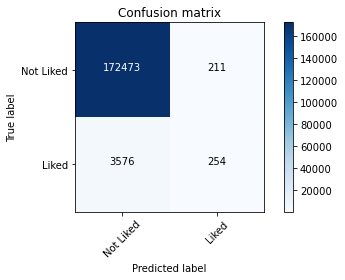

In [25]:
y_pred = log_reg.predict(X) # pred on our independent variables
predictions_nominal = [ 1 if x > 0.5 else 0 for x in y_pred] #cast the probabilities as 1 or 0 based on a threshold

# Change cwd
#os.chdir(os.getcwd() + "/Analysis")

# the plot confusion matrix function can be found in the appendix [2]
from sklearn.metrics import confusion_matrix

cnf_matrix = confusion_matrix(y, predictions_nominal)
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['Not Liked','Liked'],
                      title='Confusion matrix')

### Evaluation

From the above classification report, you can see our logistic regression model predicted 172,473 observations correctly as not being *liked*, and 254 records correctly as *liked*.  Below are the True Positives, False Positives, True Negatives, and False Negatives.  

In [26]:
tn, fp, fn, tp = confusion_matrix(y, predictions_nominal).ravel()
print("True Negatives: ",tn)
print("False Positives: ",fp)
print("False Negatives: ",fn)
print("True Positives: ",tp)

True Negatives:  172473
False Positives:  211
False Negatives:  3576
True Positives:  254


#### How accuracy is our model?

In [27]:
accuracy = (tn+tp)*100/(tp+tn+fp+fn)
print("Accuracy {:0.2f}%:".format(accuracy))

Accuracy 97.85%:


Considering our data is not entirely balanced, and it is rather skewed towards the *liked* feature being 0, the accuracy measure is acutally not that crucial and we should proceed with caution when claiming our "*our model has 97.85% accuracy*." In future analysis, we could explore metrics like Precision, Recall, and F Score over the accuracy.  

# Conclusions

Music taste and the event of an individual liking a track is a very opinionated as it is, thus it makes it very difficult to justify our findings and logistic regression model to hold true across different users and over time.  However, our analysis does provide us with a deep dive into the specific user's music listening behaviour at a specific time.  In other words, assuming the individual's taste doesn't change, we can argue that our findings will remain true.  In conclusion, we found that the danceability of a given track is affected by the level of acoustic instruments found in the same song.  This is plausible considering a vast number of dance tracks today are being developed using electronic systems (*hence the EDM genre - Electronic Dance Music*).  We then used the Pearson Correlation coefficient to identify the *popularity* audio feature as having the strongest relationship with our *liked* variable.  In other words, the correlation coefficent of 0.23, relative to the other audio features, suggested that the *popularity* feature was the strongest indicator of a track being *liked*.  This finding led the analysis into the subsequent section of studying the listening behaviour of the user and using a T-Test to declare if the *popularity* mean in the two samples, Summer and Winter, are in fact unequal.  However, the result of our statistical test indicated that we lack significant evidence to declare that the mean of the *popularity* variable between our two samples are unequal. Therefore, we can claim that the user's listening history does not change between seasons, relative to the strongest indicator of the individual *liking* a track.  In an effort to summarize our discoveries, we developed two iterations of a logsitic regression model to substantiate our findings of how the individual audio features all relate to the event of a track being *liked*. 

# Limitations & Recommendations

As we mentioned earlier, the Spotify platform is just one of many that an individual can utilize to stream and listen to music on.  It is known that the user we collected data on does use various platforms to stream music, however, given the large sample size we had at our disposle, we were able to conduct the former statistical tests.  However, it should be noted that the former situation can cause our findings to be somewhat inaccurate due to the fact the user could be listening to different genres of music across many different platforms. This is especially true if the user is using the different platforms at different times of the year, as this pertained to one of our former sections of analysis directly. Furthermore, it would be interesting to gather more data from different users.  This would allow us to further develop our logistic regression model to generalize to a larger audience than just the individual user we originally had data on.  Additionally, we could explore other aspects of multi-user data, such as comparing music tastes between the individuals, by conducting statistical tests using the audio features that are the strongest indicators for each user.  

# References

1. Arancibia, Mauricio. “Analyzing Spotify Data Tracks - What Makes a Song a Hit and Popular?” Medium, CodeX,  16 Aug. 2021, https://medium.com/codex/analyzing-spotify-data-tracks-what-makes-a-song-a-hit-and-popular-5ef319272fde.
2. Cordice, Baileigh. “Spotify Music Taste Analysis Project.” Medium, CodingBlackFemales, 15 Oct. 2020, https://medium.com/codingblackfemales/spotify-music-taste-analysis-project-edd94c6a0f4e.
3. “Developer Showcase.” Spotify for Developers, https://developer.spotify.com/community/showcase/.
4. Jankovic, Dina. “A Simple Interpretation of Logistic Regression Coefficients.” Medium, Towards Data Science, 20 Sept. 2021, https://medium.com/towards-data-science/a-simple-interpretation-of-logistic-regression-coefficients-e3a40a62e8cf.
5. Kaylin Pavlik. “Classifying Genres in R Using Spotify Data.” Kaylin Pavlik, Kaylin Pavlik, 3 Jan. 2020, https://www.kaylinpavlik.com/classifying-songs-genres/.
6. Robles, Patricio. “Spotify Launches New Version of Its Web API.” ProgrammableWeb, 17 June 2014, https://www.programmableweb.com/news/spotify-launches-new-version-its-web-api/2014/06/17.
7. Published by Statista Research Department, and Nov 4. “Spotify Users - Subscribers in 2021.” Statista, 4 Nov. 2021, https://www.statista.com/statistics/244995/number-of-paying-spotify-subscribers/.
8. Sciandra, Mariangela, and Irene Carola Spera. “A Model Based Approach to Spotify Data Analysis: A Beta GLMM.” ResearchGate, 2019, https://www.researchgate.net/publication/340171849_A_Model_Based_Approach_to_Spotify_Data_Analysis_A_Beta_GLMM.
9. Spitzer, Justin. “Analyzing Music Taste.” Medium, Towards Data Science, 27 Apr. 2021, https://towardsdatascience.com/analyzing-music-taste-64202f602bcd.
10. Statistical Inference. https://www.studocu.com/en-us/document/university-of-san-francisco/advanced-statistics/1-statistical-inference/11287373.
11. Yıldırım, Soner. “A Practical Guide to Exploratory Data Analysis: Spotify Dataset.” Medium, Towards Data Science, 2 June 2020, https://medium.com/towards-data-science/a-practical-guide-to-exploratory-data-analysis-spotify-dataset-d8f703da663e.

# Appendix

## Correlation Plot Code in RStudio

 <center> <img src="imgs/R_Corr_Code.png" style="height:400px" width="700px">  <center>

## Plot Confusion Matrix Function

In [28]:
import matplotlib.pyplot as plt
import itertools
#Evaluation of Model - Confusion Matrix Plot
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        pass

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()